Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_


--- Dataset Information ---
Total number of instances: 20640
Number of features: 8

Feature names:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude

Target Variable (House Price) Summary:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


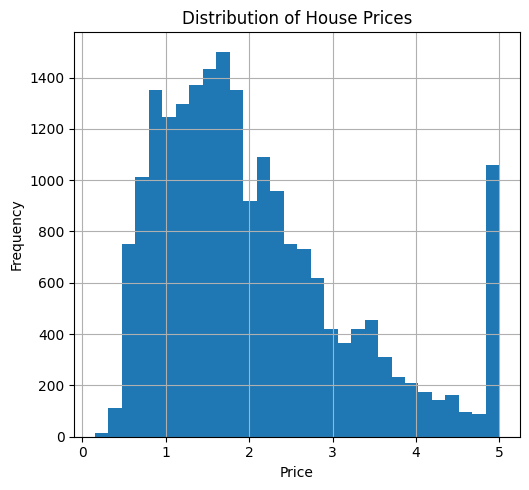


--- Preprocessing (Scaling) Effects ---
Original Data Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.880754     28.608285      5.435235      1.096685   1426.453004   
std        1.904294     12.602499      2.387375      0.433215   1137.056380   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.566700     18.000000      4.452055      1.006508    789.000000   
50%        3.545800     29.000000      5.235874      1.049286   1167.000000   
75%        4.773175     37.000000      6.061037      1.100348   1726.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup      Latitude     Longitude  
count  16512.000000  16512.000000  16512.000000  
mean       3.096961     35.643149   -119.582290  
std       11.578744      2.136665      2.005654  
min        0.692308  

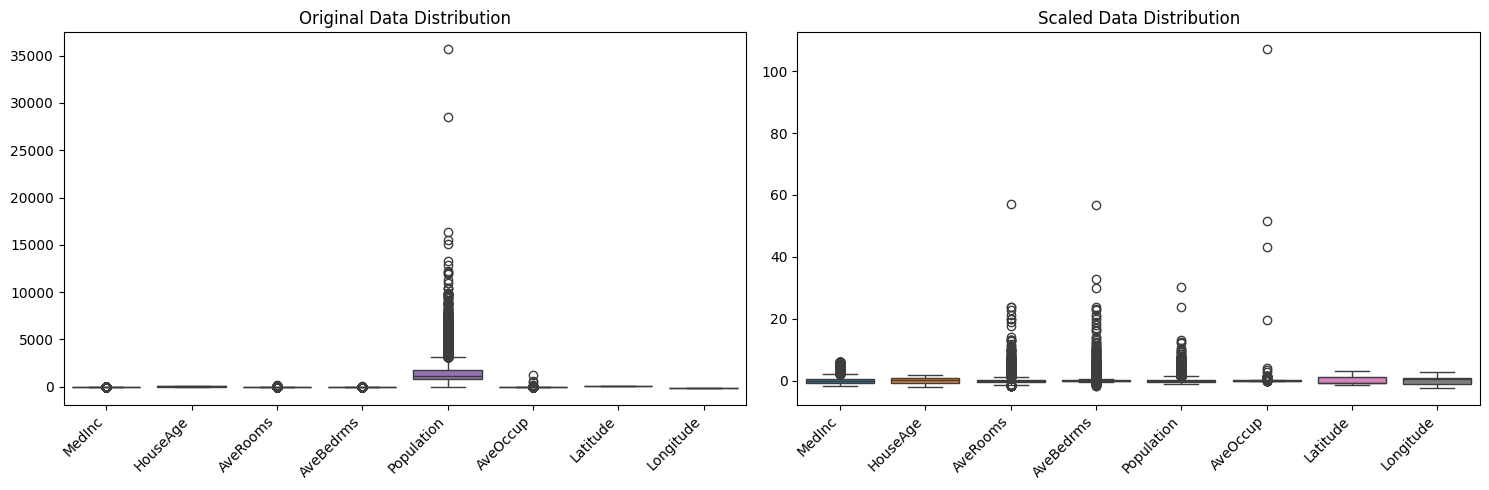

Fitting 3 folds for each of 30 candidates, totalling 90 fits

--- Grid Search Results ---
Best Parameters: {'svr__C': 10.0, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}
Best Negative RMSE: -0.5751813173674026
Best RMSE: 0.5751813173674026


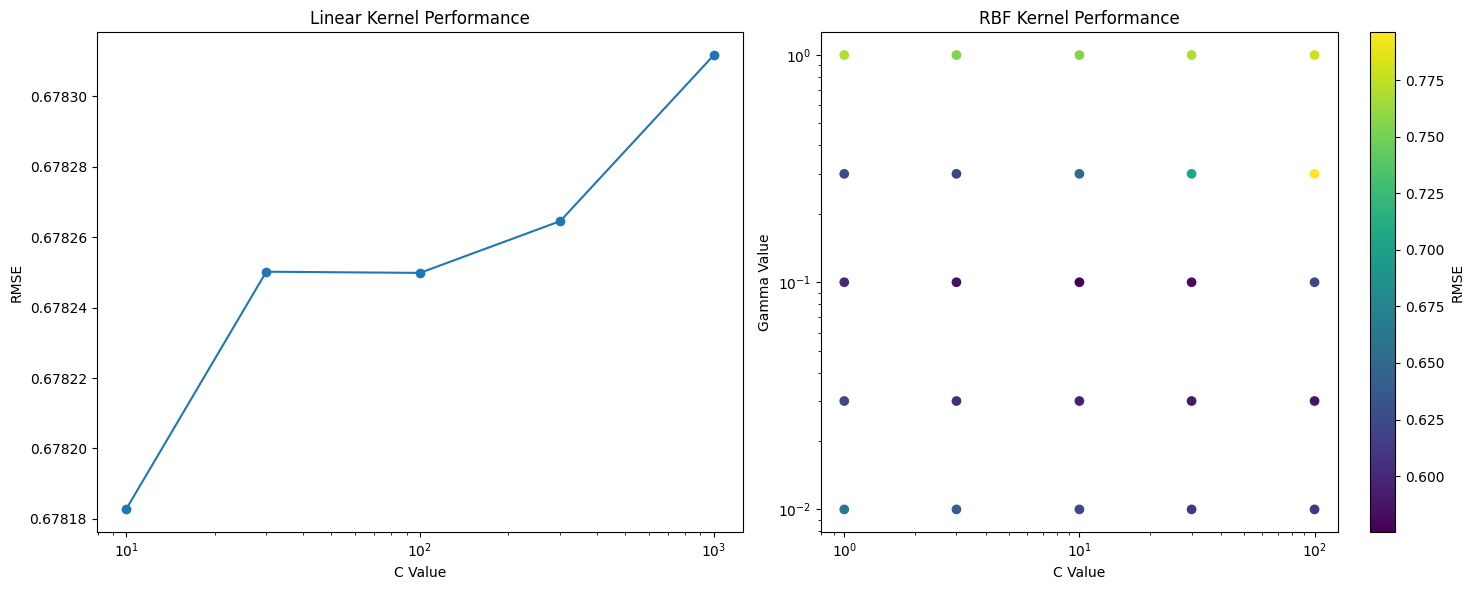


--- Model Evaluation ---
Mean Squared Error: 0.3622090696420909
Root Mean Squared Error: 0.6018380759324645
Mean Absolute Error: 0.41353607996561526
R² Score: 0.7235908211432416


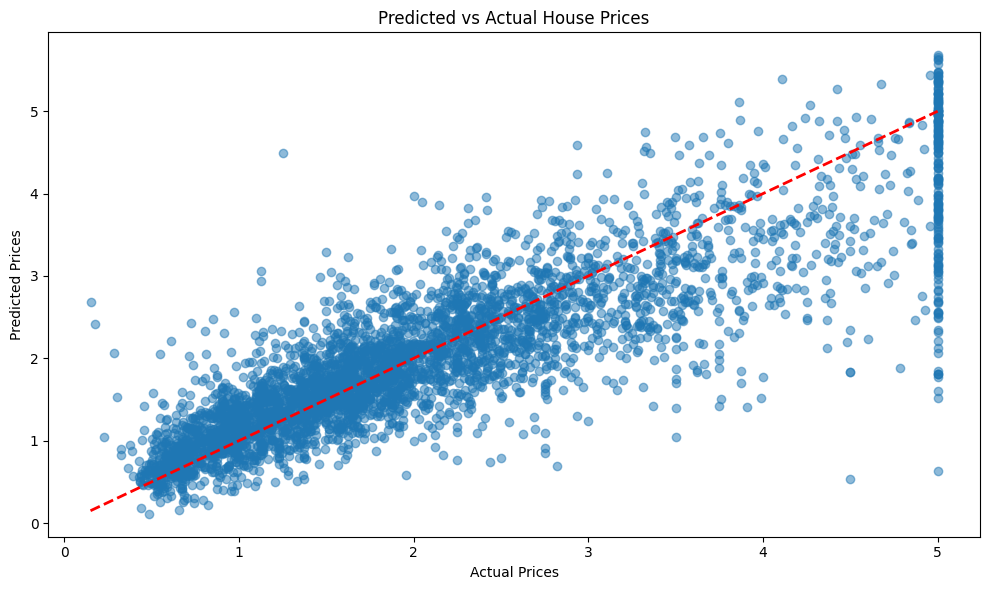

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def display_dataset_info(housing, housing_labels):
    """
    Display basic information about the dataset
    """
    print("\n--- Dataset Information ---")
    print(f"Total number of instances: {len(housing)}")
    print(f"Number of features: {housing.shape[1]}")
    print("\nFeature names:")
    for col in housing.columns:
        print(f"- {col}")
    
    # Basic statistical summary
    print("\nTarget Variable (House Price) Summary:")
    print(housing_labels.describe())
    
    # Visualize distribution of target variable
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    housing_labels.hist(bins=30)
    plt.title("Distribution of House Prices")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

def display_preprocessing_effects(housing_train, preprocessing):
    """
    Show the effects of preprocessing (scaling)
    """
    print("\n--- Preprocessing (Scaling) Effects ---")
    
    # Original data statistics
    print("Original Data Statistics:")
    print(housing_train.describe())
    
    # Scaled data
    scaled_data = preprocessing.fit_transform(housing_train)
    scaled_df = pd.DataFrame(scaled_data, columns=housing_train.columns)
    
    print("\nScaled Data Statistics:")
    print(scaled_df.describe())
    
    # Visualization of scaling
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=housing_train)
    plt.title("Original Data Distribution")
    plt.xticks(rotation=45, ha='right')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=scaled_df)
    plt.title("Scaled Data Distribution")
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

def display_grid_search_results(grid_search):
    """
    Visualize and display grid search results
    """
    print("\n--- Grid Search Results ---")
    
    # Results DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)
    
    # Best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Negative RMSE: {grid_search.best_score_}")
    print(f"Best RMSE: {-grid_search.best_score_}")
    
    # Visualize parameter performance
    plt.figure(figsize=(15, 6))
    
    # Linear kernel performance
    linear_results = results_df[results_df['param_svr__kernel'] == 'linear']
    plt.subplot(1, 2, 1)
    plt.plot(linear_results['param_svr__C'], -linear_results['mean_test_score'], marker='o')
    plt.title('Linear Kernel Performance')
    plt.xlabel('C Value')
    plt.ylabel('RMSE')
    plt.xscale('log')
    
    # RBF kernel performance
    rbf_results = results_df[results_df['param_svr__kernel'] == 'rbf']
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(rbf_results['param_svr__C'], rbf_results['param_svr__gamma'], 
                          c=-rbf_results['mean_test_score'], cmap='viridis', marker='o')
    plt.colorbar(scatter, label='RMSE')
    plt.title('RBF Kernel Performance')
    plt.xlabel('C Value')
    plt.ylabel('Gamma Value')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance
    """
    print("\n--- Model Evaluation ---")
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R² Score: {r2}")
    
    # Prediction vs Actual plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Predicted vs Actual House Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Load the California housing dataset
    data = fetch_california_housing(as_frame=True)
    housing = data.data
    housing_labels = data.target

    # Display dataset information
    display_dataset_info(housing, housing_labels)

    # Split the dataset
    housing_train, housing_test, housing_labels_train, housing_labels_test = train_test_split(
        housing, housing_labels, test_size=0.2, random_state=42
    )

    # Preprocessing pipeline
    preprocessing = Pipeline([
        ('scaler', StandardScaler())
    ])

    # Display preprocessing effects
    display_preprocessing_effects(housing_train, preprocessing)

    # Define parameter grid
    param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.]},
        {'svr__kernel': ['rbf'], 
         'svr__C': [1.0, 3.0, 10., 30., 100.], 
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0]},
    ]

    # SVR pipeline
    svr_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("svr", SVR())
    ])

    # Sample subset of data
    sample_size = 1000
    housing_sample = housing_train.iloc[:sample_size]
    housing_labels_sample = housing_labels_train.iloc[:sample_size]

    # Grid search
    grid_search = GridSearchCV(
        svr_pipeline, param_grid, cv=3, 
        scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1
    )

    # Fit grid search
    grid_search.fit(housing_sample, housing_labels_sample)

    # Display grid search results
    display_grid_search_results(grid_search)

    # Best model evaluation
    best_model = grid_search.best_estimator_
    evaluate_model(best_model, housing_test, housing_labels_test)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the housing dataset
# Assuming you're using the California housing dataset from scikit-learn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Convert to DataFrame for easier manipulation
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['median_house_value'] = y

# Split the data into features and target
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create preprocessing steps
# Since all features are numeric, we'll just use StandardScaler
preprocessor = StandardScaler()

# Define parameter grid for SVR
param_grid = [
    {'svr__kernel': ['linear'], 
     'svr__C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'svr__kernel': ['rbf'], 
     'svr__C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
     'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

# Create a pipeline
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

# Perform Grid Search
grid_search = GridSearchCV(
    svr_pipeline, 
    param_grid, 
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

# Fit the grid search (using first 5000 instances as suggested)
grid_search.fit(X_train.iloc[:1000], y_train.iloc[:1000])

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE: {:.4f}".format(-grid_search.best_score_))

# Get the best estimator
best_svr = grid_search.best_estimator_

# Predict on the full test set
y_pred = best_svr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nTest Set Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize prediction vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("SVR: Actual vs Predicted House Values")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted House Values")
plt.ylabel("Residuals")
plt.title("SVR: Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

KeyboardInterrupt: 